In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/INSAID/main/Advertising.csv") 
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Simple Linear Regression

In [4]:
df.drop(['radio','newspaper'], axis=1, inplace=True)
df.head()

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


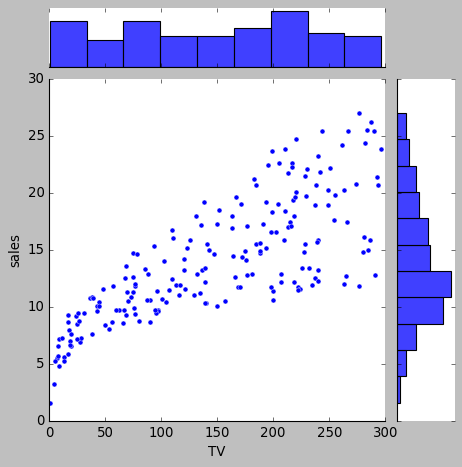

In [5]:
plt.style.use('classic')
sns.jointplot(x='TV', y='sales', data=df, kind='scatter')
plt.show()

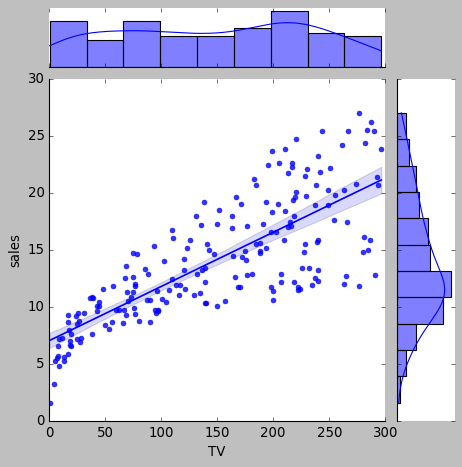

In [6]:
sns.jointplot(x='TV', y='sales', data=df, kind='reg')
plt.show()

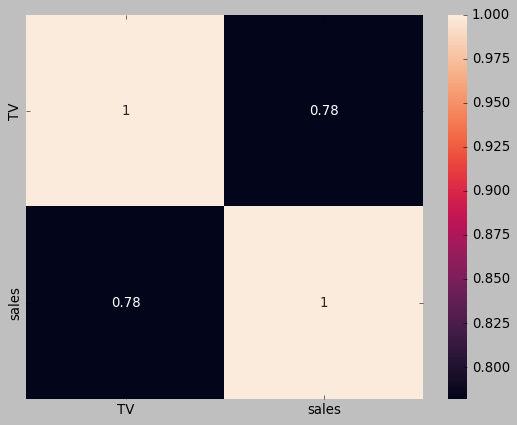

In [7]:
cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [8]:
X = df[['TV']]
y = df['sales']

In [9]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [10]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [11]:
df.shape

(200, 2)

## Model1

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

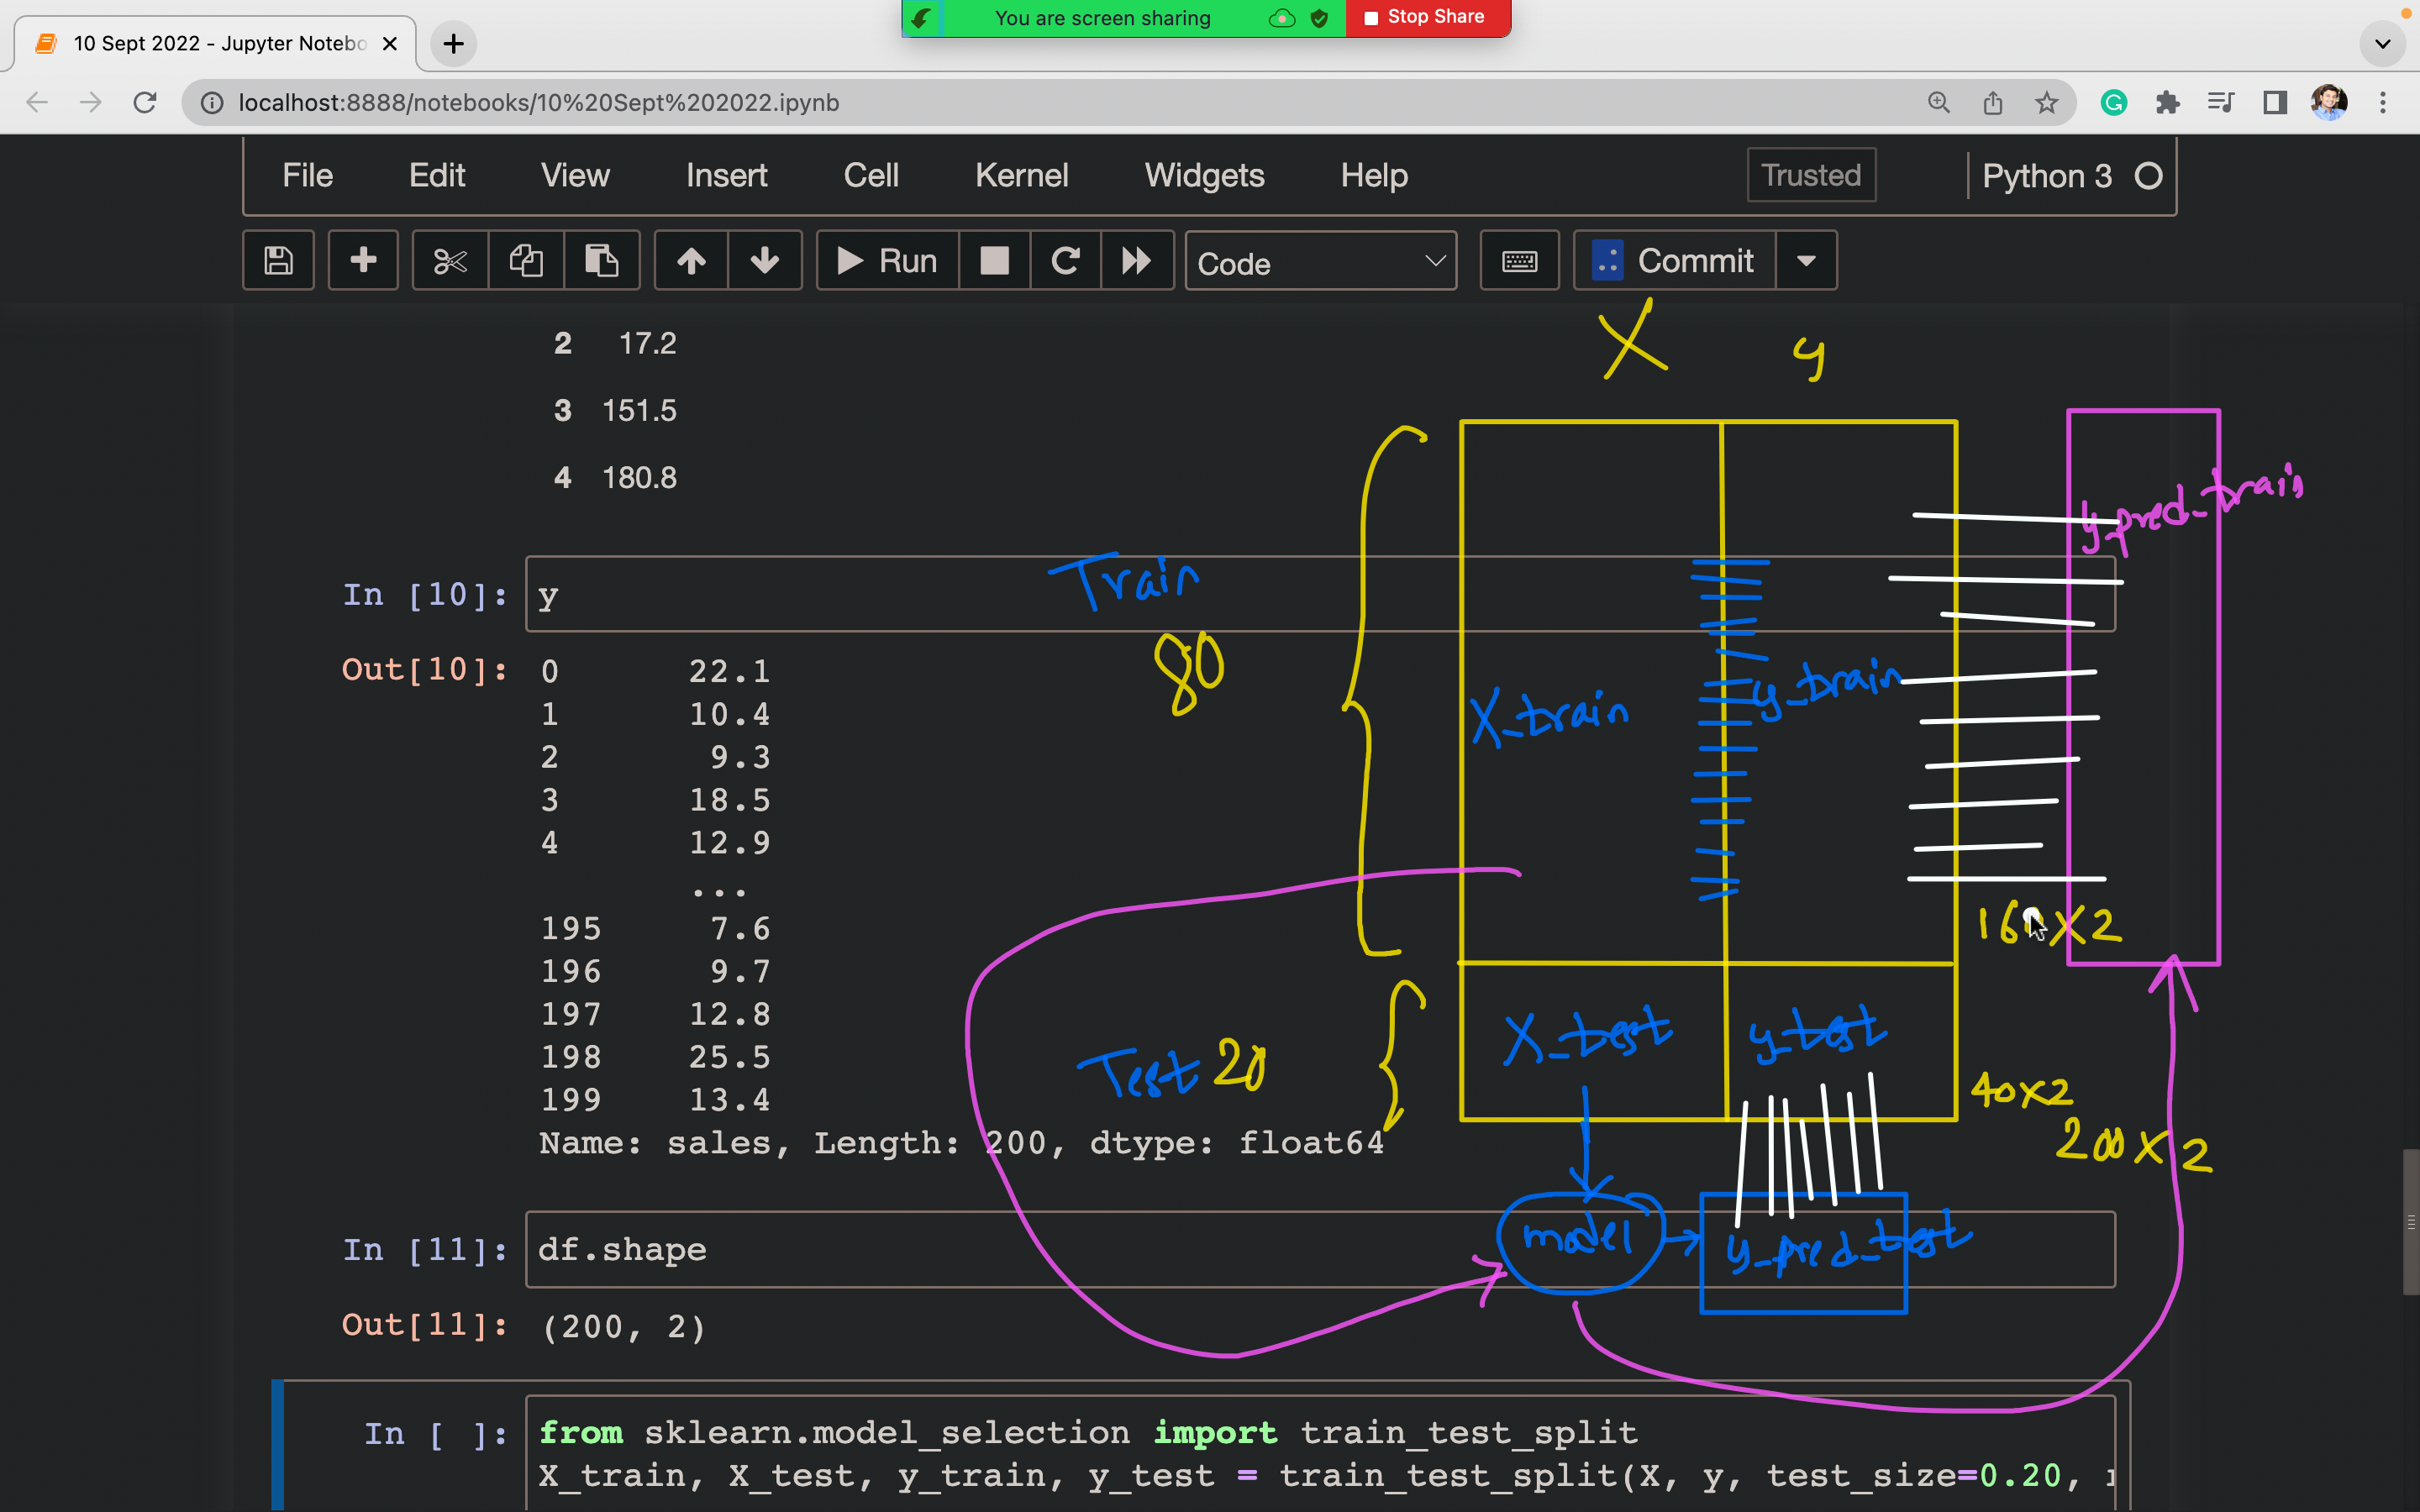

In [13]:
X_train.head()

,TV
134,36.9
66,31.5
26,142.9
113,209.6
168,215.4


In [14]:
y_train

134    10.8
66      9.5
26     15.0
113    15.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: sales, Length: 160, dtype: float64

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 1), (40, 1), (160,), (40,))

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
lr

LinearRegression()

In [18]:
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [19]:
y_test # Actual predictions

18     11.3
170     8.4
107     8.7
98     25.4
177    11.7
182     8.7
5       7.2
146    13.2
12      9.2
152    16.6
61     24.2
125    10.6
180    10.5
154    15.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     14.9
159    12.9
60      8.1
123    15.2
179    12.6
185    22.6
122    11.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      12.9
83     13.6
106     7.2
Name: sales, dtype: float64

In [20]:
y_pred_test # Predicted values

array([10.47623281,  9.59288325, 11.45159795, 20.62095042, 15.12301956,
        9.87813155,  7.69276154, 18.33896406,  8.38747917, 16.383633  ,
       19.3143292 , 11.30437303, 14.49731363, 15.93275666, 10.8074889 ,
       12.82263008, 19.51216269,  7.32469923, 10.72927566, 17.11055607,
       20.52433406, 13.74738665, 15.34845773, 13.35171966,  9.75391052,
       12.95605267, 14.91138373, 16.72409064, 17.59823864,  8.44728929,
       10.41182191, 16.44344313, 20.20688032, 18.41257652,  7.8997966 ,
        8.15283944, 10.03455803, 15.61070213, 10.43942658,  8.44268851])

In [21]:
list(zip(y_test,y_pred_test))

[(11.3, 10.476232814088151),
 (8.4, 9.592883253710221),
 (8.7, 11.451597953672115),
 (25.4, 20.620950421553434),
 (11.7, 15.123019563992884),
 (8.7, 9.878131549248929),
 (7.2, 7.692761543105613),
 (13.2, 18.338964057243786),
 (9.2, 8.387479166111172),
 (16.6, 16.383632999115555),
 (24.2, 19.31432919682775),
 (10.6, 11.30437302694246),
 (10.5, 14.49731362539185),
 (15.6, 15.932756661005989),
 (11.8, 10.807488899229876),
 (13.2, 12.822630083842027),
 (17.4, 19.512162692120725),
 (1.6, 7.324699226281475),
 (14.7, 10.729275656904747),
 (17.0, 17.110556074843227),
 (26.2, 20.5243340633871),
 (10.3, 13.747386654862673),
 (14.9, 15.34845773304767),
 (12.9, 13.351719664276724),
 (8.1, 9.753910517320783),
 (15.2, 12.956052673690778),
 (12.6, 14.911383731819006),
 (22.6, 16.72409064217788),
 (11.6, 17.59823864463521),
 (8.5, 8.447289292595094),
 (12.5, 10.411821908643926),
 (23.7, 16.44344312559948),
 (16.1, 20.20688031512628),
 (21.8, 18.41257652060861),
 (5.6, 7.89979659631919),
 (6.7, 8.15283

In [22]:
X_train.head()

,TV
134,36.9
66,31.5
26,142.9
113,209.6
168,215.4


In [23]:
X_test.head()

,TV
18,69.2
170,50.0
107,90.4
98,289.7
177,170.2


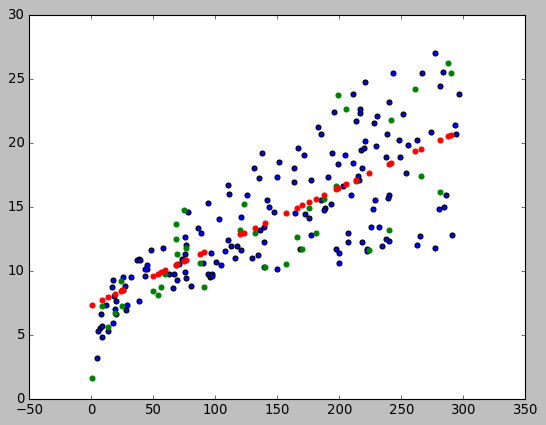

In [24]:
plt.scatter(X_train['TV'], y_train)
plt.scatter(X_test['TV'], y_test, color='green')
plt.scatter(X_test['TV'], y_pred_test, color='red')
plt.show()

In [25]:
lr

LinearRegression()

In [26]:
# SLR y = mx+c

m = lr.coef_
m
# It means 1 unit increase in TV ad spending is associated with a
# 0.04600779 unit increase in the Sales.
# i.e. An additional $ 1000 spent on TV ads is associated with an increase 
# in sales of 46.00779 widgets.

array([0.04600779])

In [27]:
c = lr.intercept_
c

7.292493773559364

In [28]:
# y = 0.04600779*x + 7.292493773559364

0.04600779*69.2 + 7.292493773559364

10.476232841559364

In [29]:
# y = 0.04600779*x + 7.292493773559364

0.04600779*50.0 + 7.292493773559364

9.592883273559364

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
print(mean_absolute_error(y_train,y_pred_train)) # train error
print(mean_absolute_error(y_test,y_pred_test)) # test error

2.578670517785736
2.505418178966003


In [32]:
print(mean_squared_error(y_train,y_pred_train)) # train error
print(mean_squared_error(y_test,y_pred_test)) # test error

10.617238416139854
10.18618193453022


In [33]:
print(np.sqrt(mean_squared_error(y_train,y_pred_train))) # train error
print(np.sqrt(mean_squared_error(y_test,y_pred_test))) # test error

3.2584104124772026
3.191579849311344


In [34]:
print(r2_score(y_train,y_pred_train)) # train error
print(r2_score(y_test,y_pred_test)) # test error

0.5884742462828709
0.6763151577939721


## Model2

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [36]:
X_train.head()

,TV
131,265.2
96,197.6
181,218.5
19,147.3
153,171.3


In [37]:
y_train

131    12.7
96     11.7
181    12.2
19     14.6
153    19.0
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: sales, Length: 140, dtype: float64

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140, 1), (60, 1), (140,), (60,))

In [39]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [40]:
lr2

LinearRegression()

In [41]:
y_pred_test = lr2.predict(X_test)
y_pred_train = lr2.predict(X_train)

In [42]:
y_test # Actual predictions

18     11.3
170     8.4
107     8.7
98     25.4
177    11.7
182     8.7
5       7.2
146    13.2
12      9.2
152    16.6
61     24.2
125    10.6
180    10.5
154    15.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     14.9
159    12.9
60      8.1
123    15.2
179    12.6
185    22.6
122    11.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      12.9
83     13.6
106     7.2
134    10.8
66      9.5
26     15.0
113    15.9
168    17.1
63     14.0
8       4.8
75      8.7
118    15.9
143    10.4
71     12.4
124    19.7
184    17.6
97     15.5
149    10.1
24      9.7
30     21.4
160    14.4
40     16.6
56      5.5
Name: sales, dtype: float64

In [43]:
y_pred_test # Predicted values

array([10.48116264,  9.60152727, 11.4524267 , 20.58322509, 15.1084112 ,
        9.8855762 ,  7.70939494, 18.31083372,  8.40119151, 16.36372418,
       19.28209777, 11.3058208 , 14.48533615, 15.91474363, 10.81102591,
       12.81769409, 19.47909945,  7.3428802 , 10.73314153, 17.08759078,
       20.48701497, 13.73856237, 15.33290148, 13.34455903,  9.76187747,
       12.95055569, 14.89766523, 16.70275031, 17.57322281,  8.46075015,
       10.41702256, 16.42328282, 20.17089601, 18.38413667,  7.91555948,
        8.16753836, 10.04134496, 15.59404323, 10.44451117,  8.45616872,
        9.00135939,  8.75396194, 13.85767966, 16.91349628, 17.17921947,
       12.01594311,  7.70481351,  8.08507255, 13.06967298, 12.10299036,
       12.34122494, 17.82520169, 18.93849021, 15.78188203,  9.35871126,
       10.16504368, 20.72983099, 15.21378419, 16.58821446,  7.64525486])

In [44]:
list(zip(y_test,y_pred_test))

[(11.3, 10.4811626437069),
 (8.4, 9.601527274006493),
 (8.7, 11.4524266977511),
 (25.4, 20.583225092610018),
 (11.7, 15.108411203068417),
 (8.7, 9.885576195472249),
 (7.2, 7.709394942307178),
 (13.2, 18.310833720883963),
 (9.2, 8.40119150910281),
 (16.6, 16.363724178578373),
 (24.2, 19.282097774928168),
 (10.6, 11.305820802801032),
 (10.5, 14.48533614953063),
 (15.6, 15.914743625293793),
 (11.8, 10.811025907344552),
 (13.2, 12.817694094473607),
 (17.4, 19.47909944626732),
 (1.6, 7.342880204932008),
 (14.7, 10.733141525652329),
 (17.0, 17.08759078489434),
 (26.2, 20.48701497404904),
 (10.3, 13.738562372128722),
 (14.9, 15.33290147971071),
 (12.9, 13.344559029450412),
 (8.1, 9.761877471608129),
 (15.2, 12.950555686772105),
 (12.6, 14.897665229077695),
 (22.6, 16.70275031065041),
 (11.6, 17.573222811916438),
 (8.5, 8.460750153926277),
 (12.5, 10.417022564666246),
 (23.7, 16.42328282340184),
 (16.1, 20.17089601306295),
 (21.8, 18.384136668358998),
 (5.6, 7.915559482080711),
 (6.7, 8.167538

In [45]:
X_train.head()

,TV
131,265.2
96,197.6
181,218.5
19,147.3
153,171.3


In [46]:
X_test.head()

,TV
18,69.2
170,50.0
107,90.4
98,289.7
177,170.2


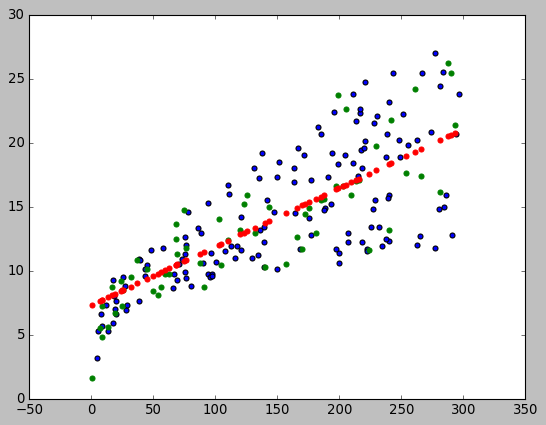

In [47]:
plt.scatter(X_train['TV'], y_train)
plt.scatter(X_test['TV'], y_test, color='green')
plt.scatter(X_test['TV'], y_pred_test, color='red')
plt.show()

In [48]:
lr2

LinearRegression()

In [49]:
# SLR y = mx+c

m = lr2.coef_
m
# It means 1 unit increase in TV ad spending is associated with a
# 0.04581434 unit increase in the Sales.
# i.e. An additional $ 1000 spent on TV ads is associated with an increase 
# in sales of 45.81434 widgets.

array([0.04581434])

In [50]:
c = lr2.intercept_
c

7.310810165411681

In [51]:
# y = 0.04581434*x + 7.310810165411681

0.04581434*69.2 + 7.310810165411681

10.48116249341168

In [52]:
# y = 0.04581434*x + 7.310810165411681

0.04581434*50.0 + 7.310810165411681

9.601527165411682

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [54]:
print(mean_absolute_error(y_train,y_pred_train)) # train error
print(mean_absolute_error(y_test,y_pred_test)) # test error

2.782980807882147
2.0575465794300083


In [55]:
print(mean_squared_error(y_train,y_pred_train)) # train error
print(mean_squared_error(y_test,y_pred_test)) # test error

11.836839324022542
7.497479593464674


In [56]:
print(np.sqrt(mean_squared_error(y_train,y_pred_train))) # train error
print(np.sqrt(mean_squared_error(y_test,y_pred_test))) # test error

3.4404707997630997
2.7381525876883988


In [57]:
print(r2_score(y_train,y_pred_train)) # train error
print(r2_score(y_test,y_pred_test)) # test error

0.5552336104251212
0.725606346597073


In [60]:
r2_train = r2_score(y_train,y_pred_train)
r2_train

0.5552336104251212

In [63]:
n = X_train.shape[0]
n

140

In [66]:
p = X_train.shape[1]
p

1

In [67]:
num = (1-r2_train)*(n-1)
den = n-p-1
ar2_train = 1-(num/den)
ar2_train

0.5520106655731294

# Happy Learning